# GOSTnets Market Access Examples: fetch Origin Destination Matrices


### Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os, inspect, logging, importlib

import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
from shapely.ops import split, unary_union
from shapely.geometry import box, Point

import matplotlib.pyplot as plt

In [3]:
# Get reference to GOSTNets
sys.path.append(r'../../../GOSTnets')
import GOSTnets as gn

In [4]:
from GOSTnets.fetch_od import *

In [5]:
# import extent
city_extent = gpd.read_file("admin/Buffalo_City.shp")

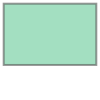

In [6]:
extent = box(*city_extent.total_bounds)
extent

In [9]:
# retrieved from the market access fetch POIs notebook results
school_destinations_gpd = gpd.read_file('osm_schools.csv',GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [10]:
school_destinations_gpd

,field_1,amenity,name,geometry
0,0,school,Port Rex Technical High,POINT (27.91170 -32.98514)
1,1,school,Hudson Park High,POINT (27.91586 -32.98572)
2,2,school,Hudson Park Primary,POINT (27.91603 -32.98316)
3,3,college,East London FET College,POINT (27.89951 -32.99601)
4,4,school,St. Johns Road Primary,POINT (27.89632 -33.00945)
...,...,...,...,...
115,115,university,University of Fort Hare,POINT (27.42815 -32.86145)
116,116,school,,POINT (27.44307 -32.88653)
117,117,school,,POINT (27.44323 -32.88988)
118,118,school,,POINT (27.38356 -32.89457)


In [21]:
# make a Lat and Lon column

In [30]:
school_destinations_gpd.loc[1].geometry.coords[0]

(27.9158605, -32.9857187)

In [52]:
school_destinations_gpd['Lon'] = school_destinations_gpd.geometry.apply(lambda geometry: geometry.x)
school_destinations_gpd['Lat'] = school_destinations_gpd.geometry.apply(lambda geometry: geometry.y)

In [53]:
school_destinations_gpd

,field_1,amenity,name,geometry,Lat,Lon
0,0,school,Port Rex Technical High,POINT (27.91170 -32.98514),-32.985143,27.911698
1,1,school,Hudson Park High,POINT (27.91586 -32.98572),-32.985719,27.915861
2,2,school,Hudson Park Primary,POINT (27.91603 -32.98316),-32.983163,27.916032
3,3,college,East London FET College,POINT (27.89951 -32.99601),-32.996010,27.899510
4,4,school,St. Johns Road Primary,POINT (27.89632 -33.00945),-33.009453,27.896321
...,...,...,...,...,...,...
115,115,university,University of Fort Hare,POINT (27.42815 -32.86145),-32.861446,27.428155
116,116,school,,POINT (27.44307 -32.88653),-32.886526,27.443067
117,117,school,,POINT (27.44323 -32.88988),-32.889881,27.443233
118,118,school,,POINT (27.38356 -32.89457),-32.894569,27.383561


### Let's create two CSVs from this one.

In [54]:
school_destinations_gpd1 = school_destinations_gpd[:10]

In [55]:
school_destinations_gpd2 = school_destinations_gpd[10:20]

In [56]:
schoolMatrix = CreateODMatrix(school_destinations_gpd1, school_destinations_gpd2, UID='field_1', sleepTime=0)

C:\Users\war-machine\Anaconda2\envs\gostnets2\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


length of sources list 1, and destinations list is 1
source list: 10
sources list: 1
dest list: 10
dests list: 1

Estimated remaining calls to chosen server: 100

save points will occur every 1 calls

1 iteration
Call to OSRM server number: 1 of 100
done with call


In [57]:
schoolMatrix

0  10    309.3
   11    237.5
   12    257.1
   13    269.0
   14    605.5
         ...  
9  15    527.0
   16    551.9
   17    482.7
   18    533.4
   19    333.3
Length: 100, dtype: float64

In [58]:
type(schoolMatrix)

pandas.core.series.Series

In [59]:
schoolMatrix[0]

309.3

In [61]:
schoolMatrix.shape

(100,)

In [62]:
# you can save as a CSV
#schoolMatrix.to_csv('school_OD_matrix.csv')

## Now try with MapBox

In [ ]:
MB_Token = 'insert private key here'

In [63]:
schoolMatrix_mapbox = CreateODMatrix(school_destinations_gpd1, school_destinations_gpd2, UID='field_1', sleepTime=0, call_type = 'MB', MB_Token = MB_Token)

length of sources list 1, and destinations list is 1
source list: 10
sources list: 1
dest list: 10
dests list: 1

Estimated remaining calls to chosen server: 100

save points will occur every 1 calls

1 iteration
Call to OSRM server number: 1 of 100
call type is MB
done with call


In [64]:
schoolMatrix_mapbox

0  10    497.7
   11    928.4
   12    393.2
   13    469.6
   14    896.5
         ...  
9  15    740.8
   16    821.1
   17    692.2
   18    732.9
   19    482.1
Length: 100, dtype: float64

### now with Mapbox traffic

In [67]:
schoolMatrix_mapbox_traffic = CreateODMatrix(school_destinations_gpd1, school_destinations_gpd2, UID='field_1', sleepTime=0, call_type = 'MBT', MB_Token = MB_Token)

length of sources list 2, and destinations list is 2
source list: 10
sources list: 2
dest list: 10
dests list: 2

Estimated remaining calls to chosen server: 100

save points will occur every 2 calls

1 iteration
Call to OSRM server number: 1 of 100
call type is MBT
done with call
1 iteration
Call to OSRM server number: 2 of 100
call type is MBT
done with call
1 iteration
Call to OSRM server number: 3 of 100
call type is MBT
done with call
1 iteration
Call to OSRM server number: 4 of 100
call type is MBT
done with call


In [68]:
schoolMatrix_mapbox_traffic

0  10    543.1
   11    951.5
   12    429.8
   13    482.9
   14    880.8
         ...  
9  15    720.2
   16    756.2
   17    712.9
   18    729.3
   19    486.6
Length: 100, dtype: float64